In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap as umap
import matplotlib.patches as mpatches

c:\users\karapardazesh\appdata\local\programs\python\python39\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\users\karapardazesh\appdata\local\programs\python\python39\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\users\karapardazesh\appdata\local\p

In [3]:
df=pd.read_csv('anomaly.csv')

In [4]:
m=3.5

params = {
    # Font family
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],

    # Font sizes
    "axes.labelsize": 10*m,
    "font.size": 10*m,
    "legend.fontsize": 10*m,
    "xtick.labelsize": 9*m,
    "ytick.labelsize": 9*m,

    # Style for axis labels (xlabel, ylabel)
    'axes.labelweight': 'bold',
    'axes.labelcolor': 'black',

    # General styles for other elements
    'font.weight': 'bold',       # Makes title, etc., bold
    'xtick.color': 'black',      # Sets tick label color
    'ytick.color': 'black',
    'legend.labelcolor': 'black'
}

plt.rcParams.update(params)

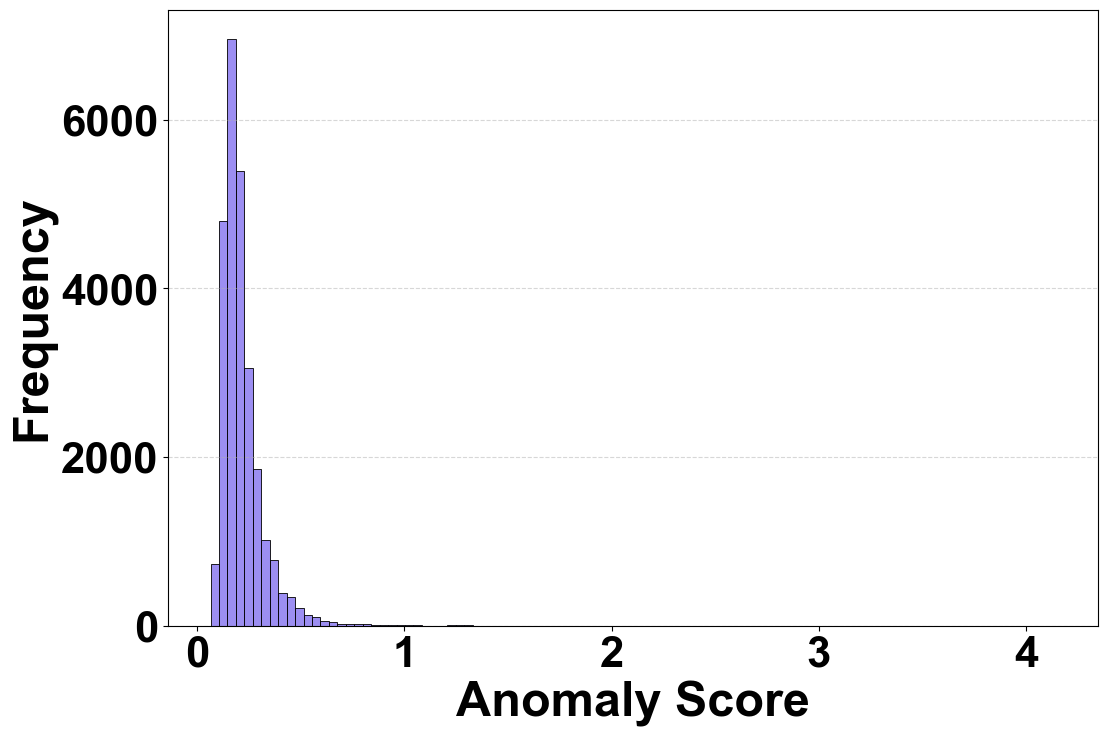

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data=df, x='anomaly_score', kde=False, ax=ax, bins=100,color='mediumslateblue')

ax.set_xlabel('Anomaly Score')
ax.set_ylabel('Frequency')

ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig(f"figs/fig3_hist_anomalyscores.pdf",bbox_inches='tight',dpi=600 )

In [6]:
scores = df['anomaly_score'].values
sorted_scores = np.sort(scores)

x = np.arange(len(sorted_scores))
y = sorted_scores

# The elbow point is the point on the curve with the maximum perpendicular 
# distance to the line connecting the first and last points.
p1 = np.array([x[0], y[0]])
p2 = np.array([x[-1], y[-1]])

# Calculate the distance of each point from the line connecting p1 and p2
line_vec = p2 - p1
line_vec_norm = line_vec / np.sqrt(np.sum(line_vec**2))
vec_from_first = np.array([[xi, yi] for xi, yi in zip(x, y)]) - p1
scalar_product = np.sum(vec_from_first * np.tile(line_vec_norm, (len(x), 1)), axis=1)
vec_from_first_parallel = np.outer(scalar_product, line_vec_norm)
vec_to_line = vec_from_first - vec_from_first_parallel
dist_to_line = np.sqrt(np.sum(vec_to_line ** 2, axis=1))

# The elbow point is the one with the maximum distance.
elbow_index = np.argmax(dist_to_line)

# The threshold is the anomaly score at the elbow index.
anomaly_threshold = y[elbow_index]

print(f"✅ Anomaly score threshold found: {anomaly_threshold:.4f}")

✅ Anomaly score threshold found: 0.4666


In [9]:
df[df['anomaly_score']>0.46666].shape[0]/df.shape[0]*100

2.8011527377521612

C:\Users\KaraPardazesh\AppData\Local\Temp\ipykernel_23236\4199803627.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot([x[0], x[-1]], [y[0], y[-1]], 'r--', label='Reference Line', color='tomato',linewidth=4)


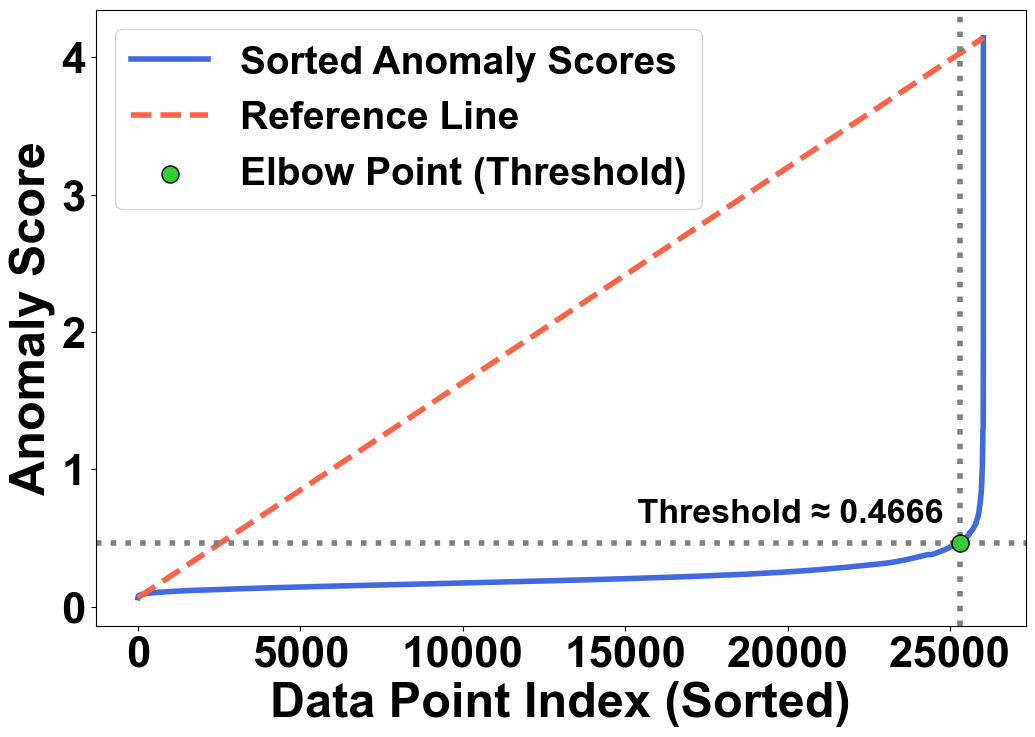

In [9]:

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(x, y, label='Sorted Anomaly Scores', color='royalblue', linewidth=4)

# Plot the line from the first to the last point
ax.plot([x[0], x[-1]], [y[0], y[-1]], 'r--', label='Reference Line', color='tomato',linewidth=4)

# Highlight the elbow point
ax.scatter(elbow_index, anomaly_threshold, color='limegreen', s=150, zorder=5, 
            edgecolor='black', label='Elbow Point (Threshold)')

# Add annotation lines for the threshold
ax.axhline(y=anomaly_threshold, color='grey', linestyle=':', linewidth=4)
ax.axvline(x=elbow_index, color='grey', linestyle=':', linewidth=4)

#plt.title('Elbow Method for Anomaly Detection Threshold', fontweight='bold')
ax.set_xlabel('Data Point Index (Sorted)', color='k')
ax.set_ylabel('Anomaly Score',color='k' )
ax.legend(prop={'size': m*8})

# Add text to show the threshold value
ax.text(elbow_index*0.98, anomaly_threshold*1.2, f' Threshold ≈ {anomaly_threshold:.4f}', 
         horizontalalignment='right', verticalalignment='bottom', fontsize=m*7,color='k')

plt.savefig('Figs/fig_elbow.pdf',bbox_inches='tight',dpi=600)

In [18]:
selected_features = [
    'topo_num_edges',
    'topo_num_nodes',
    'topo_graph_transitivity',
    'topo_graph_entropy',
    'topo_graph_density',
    'topo_avg_ring_size',
    'topo_coordination_number_mean',
    'link_linker_bond_length_std',
    'geo_pld', # Pore Limiting Diameter
    'geo_lcd', 'geo_surface_area_m2cm3','chem_density',
    'geo_void_fraction',
    'chem_volume_per_atom',
    'chem_avg_electronegativity'
]

In [11]:
vibrant_palette = {'Normal': '#0077b6', 'Anomaly': '#fb8500'}


In [13]:
anomaly_threshold = 0.46666

# Create the two datasets based on the anomaly score
anomaly_df = df[df['anomaly_score'] > anomaly_threshold].copy()
normal_df = df[df['anomaly_score'] <= anomaly_threshold].copy()

# Add a 'group' column to identify each dataset
anomaly_df['group'] = 'Anomaly'
normal_df['group'] = 'Normal'

# Combine the two datasets into one for easier plotting
plot_df = pd.concat([normal_df, anomaly_df], ignore_index=True)


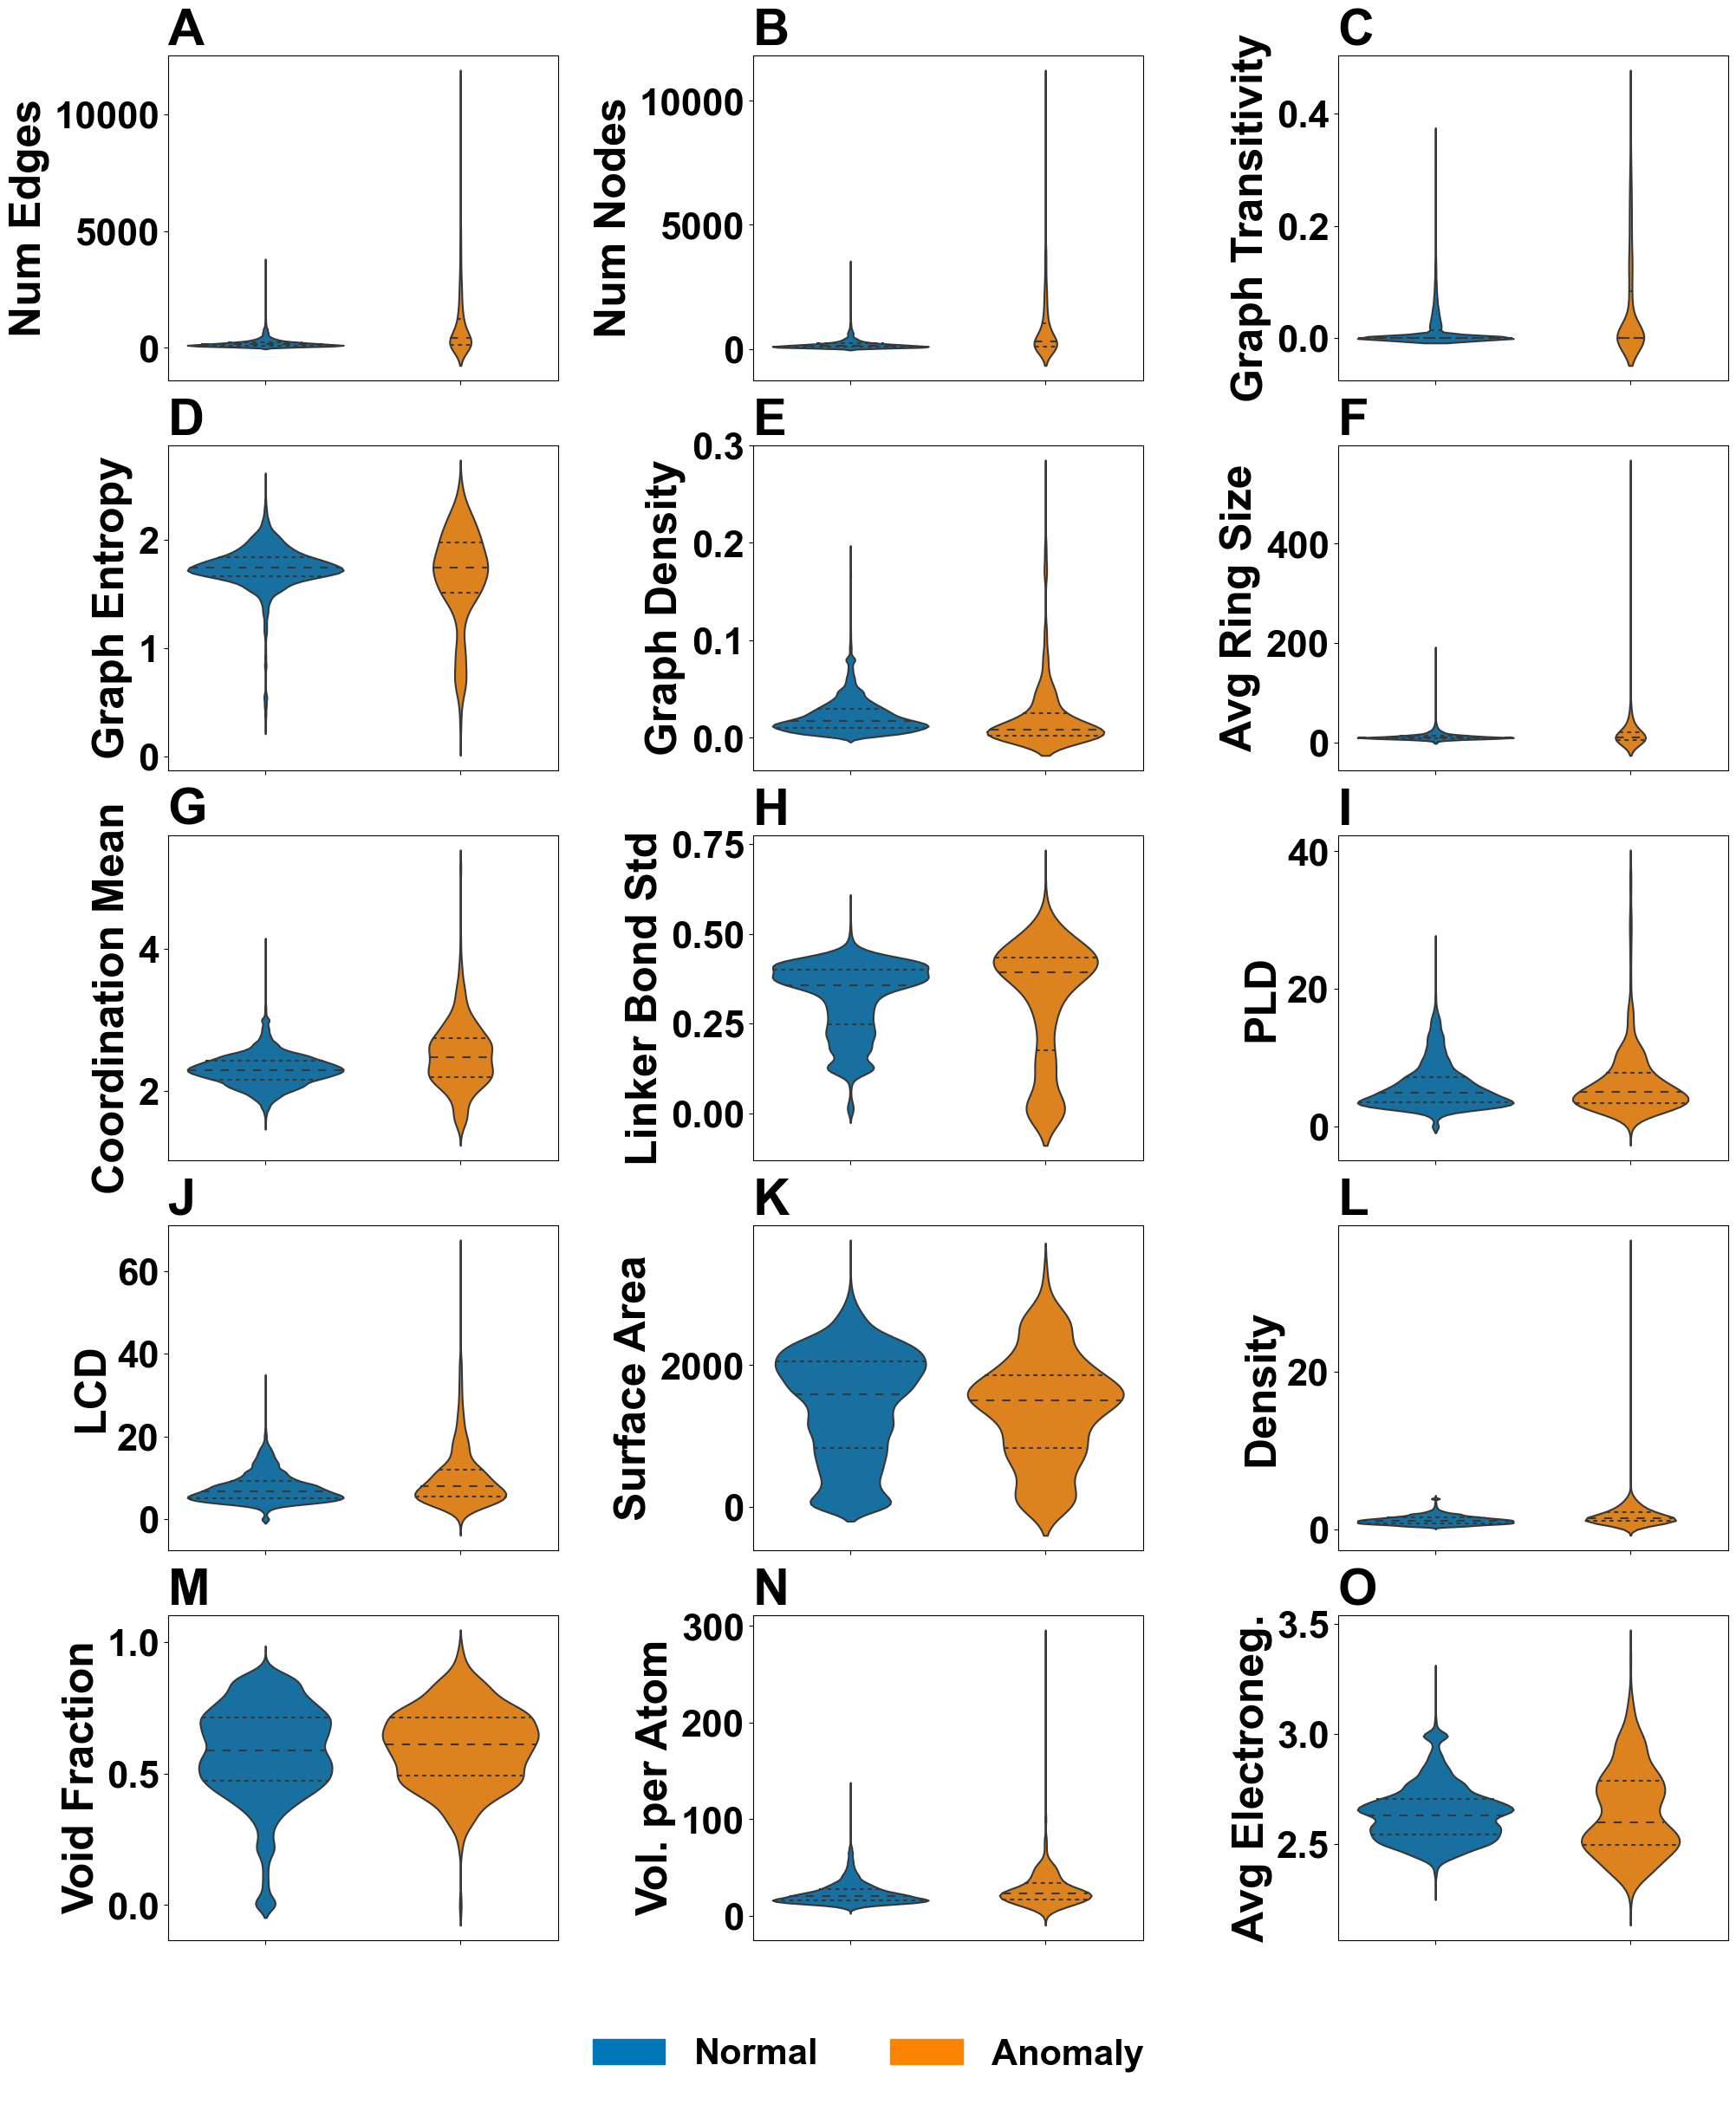

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25))

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()
readable_features = [
    'Num Edges',
    'Num Nodes',
    'Graph Transitivity',
    'Graph Entropy',
    'Graph Density',
    'Avg Ring Size',
    'Coordination Mean',
    'Linker Bond Std',
    'PLD', # Already short
    'LCD', 'Surface Area','Density',
    'Void Fraction',
    'Vol. per Atom',
    'Avg Electroneg.'
]
# Iterate through each feature and create a violin plot on its own subplot
for i, feature in enumerate(selected_features):
    ax = axes_flat[i]
    sns.violinplot(
        x='group',
        y=feature,
        data=plot_df,
        ax=ax,
        palette=vibrant_palette,
        inner='quartile', 
        linewidth=1.5
    )
    # Set the title for each subplot using the y-label for clarity
    title_letter = chr(ord('A') + i)
    ax.set_title(f'{title_letter}', loc='left', fontweight='bold',color='black')
    ax.set_ylabel(readable_features[i], fontsize=36, fontweight='bold',color='black')
    ax.set_xlabel('') # Remove individual x-axis labels
    ax.set_xticklabels([])
    ax.tick_params(axis='y', colors='black')

# --- 4. Final Touches and Cleanup ---

# Add a main title for the entire figure

# Create and add a custom legend to the figure
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in vibrant_palette.items()]
fig.legend(handles=legend_handles, loc='lower center', fontsize=30, title='',frameon=False,ncols=2)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.05, 0.95, 0.97]) 
fig.subplots_adjust(bottom=0.08, hspace=0.2, wspace=0.5, left=0.05, right=0.95, top=0.95)

# Display the plot
plt.savefig('Figs/fig6_violin_comparison.pdf',bbox_inches='tight')